<a href="https://colab.research.google.com/github/ShivamBhati105/ML-models/blob/main/House_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**House Price Prediction**

# 1.Problem definition
Develop a machine learning model for predicting house prices using Python
 scikit-learn, and TensorFlow.

# 2.Data

The data is downloaded from Kaggle Bluebook for Housing price predictions,i.e.-
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


# 3.Evaluation

Evaluation will be based on common regression metrics such as Mean Absolute Error (MAE),**bold text** Mean Sqaured Error(MSE), and Root Mean Squared Error(RMSE).

# 4.Features

In the dataset it is to ensure a successful house price prediction model, it's crucial to select relevant features that influence house prices:
* Age of Property: Current Year - Year Built
* Bathroom to Bedroom Ratio: Number of Bathrooms / Number of Bedrooms
* Price per SqFt: Price / Square Footage


## Importing Libraries

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Importing package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import calendar as calendar

from pandas.api.types import CategoricalDtype


from sklearn.preprocessing import StandardScaler


from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge



## Loading Datasets

In [ ]:
df_train =  pd.read_csv('drive/MyDrive/Housing-Price-Predictions/train .csv')
df_test =  pd.read_csv('drive/MyDrive/Housing-Price-Predictions/test .csv')


In [ ]:
df_train


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df = pd.concat([df_train,df_test])

print("Shape of Integrated Data/ DF: ",df.shape)

Shape of Integrated Data/ DF:  (2919, 81)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
int_features = df.select_dtypes(include=["int64"]).columns
print("Total number of integer features :",int_features.shape[0])
print("Integer feature names :",int_features.tolist())

Total number of integer features : 26
Integer feature names : ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
float_features = df.select_dtypes(include=["float64"]).columns
print("Total number of float features :",float_features.shape[0])
print("Floating feature names :",float_features.tolist())

Total number of float features : 12
Floating feature names : ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [ ]:
cat_features = df.select_dtypes(include=["object"]).columns
print("Total number of categorical features :",cat_features.shape[0])
print("Categorical feature names :",cat_features.tolist())

Total number of categorical features : 43
Categorical feature names : ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### Get the Statistical Information of Numerical Features

In [ ]:
df.describe() # It conatain description of numerical data(int and float only)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


## Handle Missing Value

<Axes: >

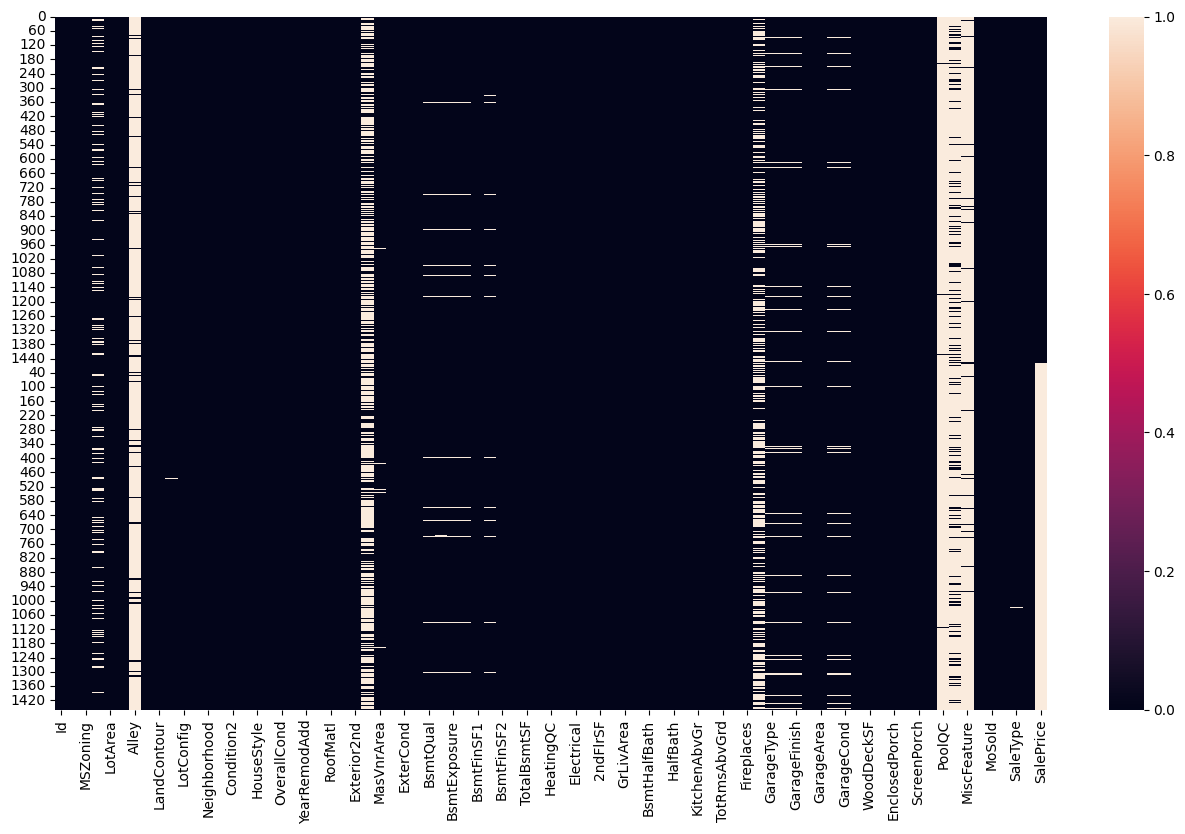

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

#### Get the null value percentage for every features

In [ ]:
# set index as ID Column
df = df.set_index("Id")

In [ ]:
null_count = df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [ ]:
null_percentage = (df.isnull().sum()/df.shape[0])*100
null_percentage

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

### Drop Column/Feature

In [ ]:
""" As per domain knowlege we will not drop those feature,instead **None** value we will add constant value 'NA'"""
miss_value_50_perc = null_percentage[null_percentage>50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [ ]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [ ]:
""" As per domain knowlege we will not drop 'FireplaceQu' feature,instead **None** value we will add constant value 'NA'"""
miss_value_20_to_50_perc = null_percentage[(null_percentage>20) & (null_percentage<=50)]
miss_value_20_to_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [ ]:
""" As per domain knowlege we will not drop those feature,instead **None** value we will add constant value 'NA'"""
miss_value_5_to_20_perc = null_percentage[(null_percentage>5) & (null_percentage<=20)]
miss_value_5_to_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [ ]:
df["LotFrontage"].value_counts()

LotFrontage
60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
152.0      1
138.0      1
182.0      1
168.0      1
133.0      1
Name: count, Length: 128, dtype: int64

##### As per above domain in knowledge we will not drop any features

## Missing Value Imputation

In [ ]:
missing_value_features = null_percentage[null_percentage>0]
missing_value_features

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [ ]:
cat_na_features = missing_value_features[missing_value_features.keys().isin(cat_features)]
cat_na_features

MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [ ]:
int_na_features = missing_value_features[missing_value_features.keys().isin(int_features)]
int_na_features

Series([], dtype: float64)

In [ ]:
float_na_features = missing_value_features[missing_value_features.keys().isin(float_features)]
float_na_features

LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

##### Backup of original data


In [ ]:
# Backup of original data
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

#### Handing MSZoining = 0.137033

In [ ]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [ ]:
def oldNewCountPlot(df,df_new,feature):
  plt.subplot(1,2,1)
  sns.countplot(x=df[feature])
  plt.title('Old dataframe')
  plt.subplot(1,2,2)
  sns.countplot(x=df_new[feature])
  plt.title('New dataframe')
  plt.tight_layout()
  plt.show()

In [ ]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"] = df["MSZoning"].replace(np.nan , mszoning_mode)
df_mvi["MSZoning"].isnull().sum()

0

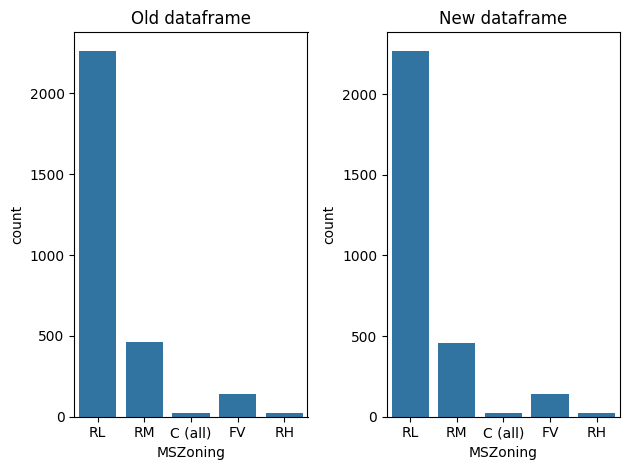

In [ ]:
oldNewCountPlot(df,df_mvi,"MSZoning")

In [ ]:
#### Handle LotFrontage == 16.649538
def boxDistPlot(df,figsize=(10,5)):
  plt.figure(figsize=figsize)
  plt.subplot(1,2,1)
  sns.boxplot(x=df)
  plt.subplot(1,2,2)
  sns.distplot(x=df)
  plt.tight_layout()
  plt.show()

<ipython-input-30-daa690674142>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df)


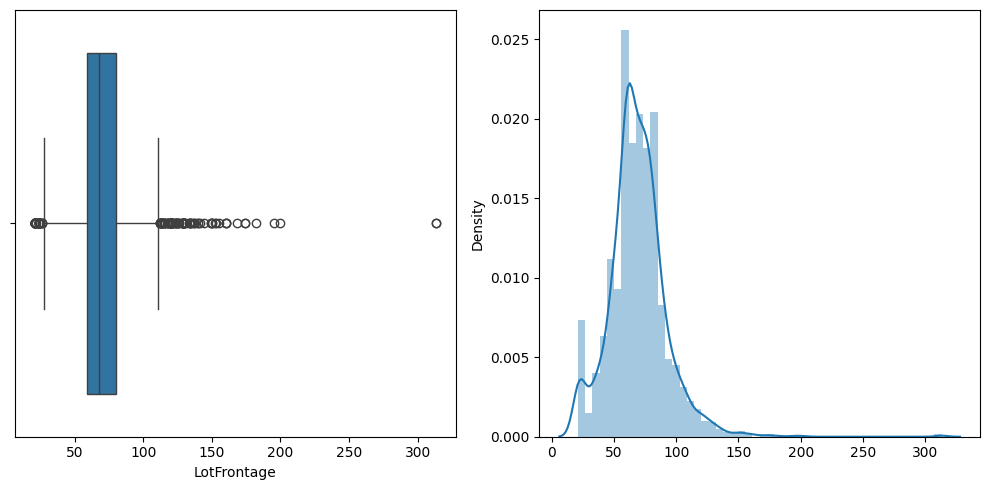

In [ ]:
boxDistPlot(df_mvi["LotFrontage"])

In [ ]:
lotfrontage_median = df_mvi["LotFrontage"].median()
df_mvi["LotFrontage"] = df_mvi["LotFrontage"].replace(np.nan , lotfrontage_median)
df_mvi["LotFrontage"].isnull().sum()

0

In [ ]:
def oldNewBoxDistPlot(df,df_new,feature):
  plt.subplot(2,2,1)
  sns.boxplot(x=df[feature])
  plt.title('Old dataframe')
  plt.subplot(2,2,2)
  sns.distplot(x=df_new[feature])
  plt.title('Old dataframe')
  plt.subplot(2,2,3)
  sns.boxplot(x=df[feature])
  plt.title('New dataframe')
  plt.subplot(2,2,4)
  sns.distplot(x=df_new[feature])
  plt.title('New dataframe')

  plt.tight_layout()
  plt.show()

<ipython-input-33-0f89cae7c855>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_new[feature])
<ipython-input-33-0f89cae7c855>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df_new[feature])


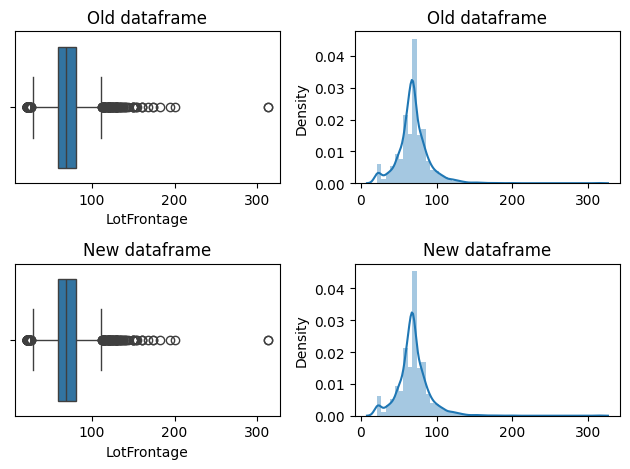

In [ ]:
oldNewBoxDistPlot(df,df_mvi,"LotFrontage")

#### Handling Alley =93.2168

In [ ]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [ ]:
alley_cont ="NA"
df_mvi["Alley"] = df_mvi["Alley"].replace(np.nan , alley_cont)
df_mvi["Alley"].isnull().sum()

0

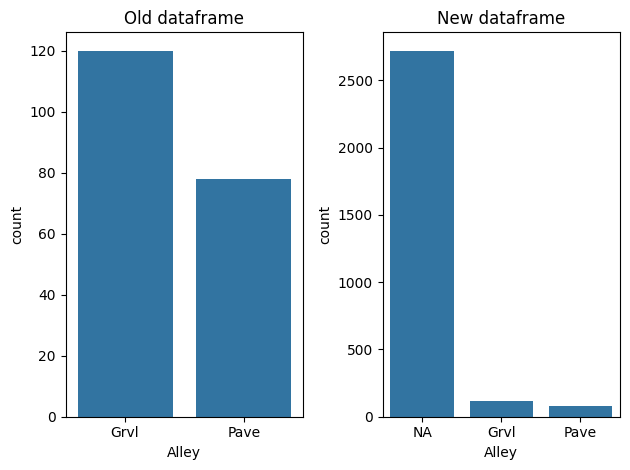

In [ ]:
oldNewCountPlot(df,df_mvi,"Alley")

#### Handling Utilities  ==  0.068517

In [ ]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [ ]:
Utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"] = df_mvi["Utilities"].replace(np.nan , Utilities_mode)
df_mvi["Utilities"].isnull().sum()

0

In [ ]:
df_mvi["Utilities"].value_counts()

Utilities
AllPub    2918
NoSeWa       1
Name: count, dtype: int64

#### Handling MasVnrType == 60.500171

In [ ]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [ ]:
# Here Maximum value is 0..
masvnrtype_mode = 0
df_mvi["MasVnrType"] = df_mvi["MasVnrType"].replace(np.nan , masvnrtype_mode)
df_mvi["MasVnrType"].isnull().sum()

0

#### Handling MasVnrArea ==  0.787941

In [ ]:
df["MasVnrArea"].value_counts()

MasVnrArea
0.0      1738
120.0      15
176.0      13
200.0      13
216.0      12
         ... 
137.0       1
274.0       1
415.0       1
760.0       1
382.0       1
Name: count, Length: 444, dtype: int64

In [ ]:
masvnrarea = 0
df_mvi["MasVnrArea"] = df_mvi["MasVnrArea"].replace(np.nan , masvnrarea)
df_mvi["MasVnrArea"].isnull().sum()

0

#### Handling Bsmt feature

In [ ]:
"""
cat_bmt_feature =
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665


num_bmt_feature =
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
"""

'\ncat_bmt_feature =\nBsmtQual         2.774923\nBsmtCond         2.809181\nBsmtExposure     2.809181\nBsmtFinType1     2.706406\nBsmtFinType2     2.740665\n\n\nnum_bmt_feature =\nBsmtFinSF1       0.034258\nBsmtFinSF2       0.034258\nBsmtUnfSF        0.034258\nTotalBsmtSF      0.034258\nBsmtFullBath     0.068517\nBsmtHalfBath     0.068517\n'

In [ ]:
cat_bsmt_feature = [ 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
num_bsmt_feature = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']

<Axes: ylabel='Id'>

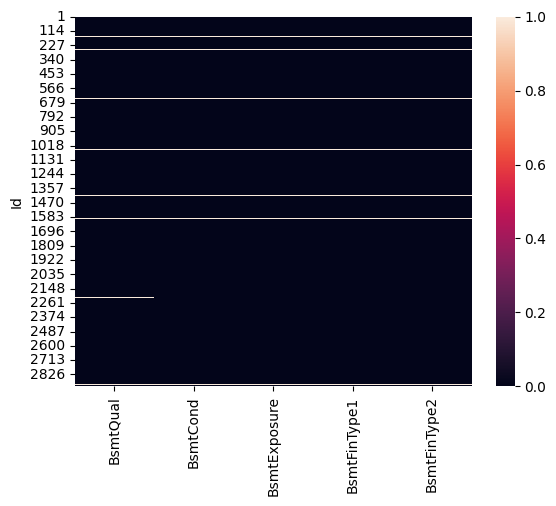

In [ ]:
sns.heatmap(df[cat_bsmt_feature].isnull())

In [ ]:
for feature in cat_bsmt_feature:
  print(f"Value count of  {feature}: {df[feature].value_counts()}")

Value count of  BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value count of  BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value count of  BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value count of  BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value count of  BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [ ]:
#"Categorical Null values"
bsmt_cont ="NA"
for feature in cat_bsmt_feature:
  df_mvi[feature] = df_mvi[feature].replace(np.nan , bsmt_cont)

In [ ]:
df_mvi[cat_bsmt_feature].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

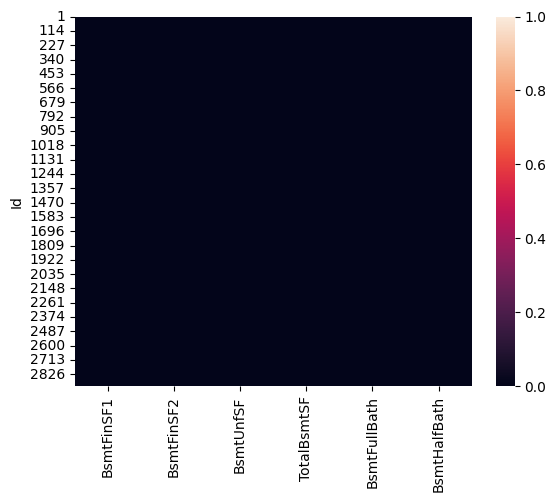

In [ ]:
sns.heatmap(df[num_bsmt_feature].isnull())

In [ ]:
df_bsmt =df[cat_bsmt_feature+num_bsmt_feature]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2804,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2805,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2825,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Numerical null values
bsmt_num =0
for feature in num_bsmt_feature:
  df_mvi[feature] = df_mvi[feature].replace(np.nan , bsmt_num)

In [ ]:
df_mvi[num_bsmt_feature].isnull().sum()


BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

#### Handling Electrical  ==  0.034258   and KitchenQual == 0.034258

In [ ]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [ ]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [ ]:
df["Electrical"].isna().sum()

1

In [ ]:
df["KitchenQual"].isna().sum()

1

In [ ]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"] = df_mvi["Electrical"].replace(np.nan , electrical_mode)
df_mvi["Electrical"].isnull().sum()

0

In [ ]:
kitchenqual =df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"] = df_mvi["KitchenQual"].replace(np.nan,kitchenqual)
df_mvi["KitchenQual"].isnull().sum()

0

#### Handling Remaining categorical features

In [ ]:
# handling Remaining cat
"""
Functional      0.034258  mode
FireplaceQu     48.646797  NA
PoolQC          99.657417  NA
Fence           80.438506  NA
MiscFeature     96.402878  NA
SaleType         0.034258  mode
"""

'\nFunctional      0.034258  mode\nFireplaceQu     48.646797  NA\nPoolQC          99.657417  NA\nFence           80.438506  NA\nMiscFeature     96.402878  NA\nSaleType         0.034258  mode\n'

In [ ]:
df["Functional"].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [ ]:
df["Functional"].isnull().sum()

2

In [ ]:
functional = df["Functional"].mode()[0]
df_mvi["Functional"] =df_mvi["Functional"].replace(np.nan,functional)
df_mvi["Functional"].isnull().sum()

0

In [ ]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [ ]:
saletype = df["SaleType"].mode()[0]
df_mvi["SaleType"] =df_mvi["SaleType"].replace(np.nan,saletype)
df_mvi["SaleType"].isnull().sum()

0

In [ ]:
other_cat_features = ["FireplaceQu","PoolQC","Fence","MiscFeature"]

for feature in other_cat_features:
  print(f"Value count of  {feature}: {df[feature].value_counts()}")


Value count of  FireplaceQu: FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
Value count of  PoolQC: PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value count of  Fence: Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value count of  MiscFeature: MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [ ]:
for feature in other_cat_features:
  df_mvi[feature] = df_mvi[feature].replace(np.nan,"NA")


In [ ]:
for feature in other_cat_features:
  print( df_mvi[feature].isnull().sum())

0
0
0
0


In [ ]:
#### Handling Garage features

In [ ]:
"""
cat_garage_feature =
GarageType       5.378554 NA
GarageFinish     5.447071 NA
GarageQual       5.447071 NA
GarageCond       5.447071 NA

garage_num_feature =
GarageYrBlt      5.447071 0
GarageCars       0.034258 0
GarageArea       0.034258 0
"""

'\ncat_garage_feature =\nGarageType       5.378554 NA\nGarageFinish     5.447071 NA\nGarageQual       5.447071 NA\nGarageCond       5.447071 NA\n\ngarage_num_feature =\nGarageYrBlt      5.447071 0\nGarageCars       0.034258 0\nGarageArea       0.034258 0\n'

In [ ]:
garage_cat_features = ["GarageType","GarageFinish","GarageQual","GarageCond"]
garage_num_features = ["GarageYrBlt","GarageCars","GarageArea"]

df_garage = df[garage_cat_features+garage_num_features]
df_garage[df_garage.isnull().any(axis=1)]

,GarageType,GarageFinish,GarageQual,GarageCond,GarageYrBlt,GarageCars,GarageArea
Id,,,,,,,
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0
49,NaN,NaN,NaN,NaN,NaN,0.0,0.0
79,NaN,NaN,NaN,NaN,NaN,0.0,0.0
89,NaN,NaN,NaN,NaN,NaN,0.0,0.0
90,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...
2894,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2910,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2914,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [ ]:
garage_cont ="NA"
for feature in garage_cat_features:
  df_mvi[feature] = df_mvi[feature].replace(np.nan , garage_cont)

df_mvi[garage_cat_features].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [ ]:
garage_num = 0
for feature in garage_num_features:
  df_mvi[feature] = df_mvi[feature].replace(np.nan , garage_num)

df_mvi[garage_num_features].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

## Feature Transformation

####  Convert Numerical feature to Categorical feature

In [ ]:
for_num_conv = ["MSSubClass","YearBuilt","YearRemodAdd","YrSold","MoSold"]
for feature in for_num_conv:
  print(f"{feature} : {df_mvi[feature].dtype}")

MSSubClass : int64
YearBuilt : int64
YearRemodAdd : int64
YrSold : int64
MoSold : int64


In [ ]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,YrSold,MoSold
Id,,,,,
1,60,2003,2003,2008,2
2,20,1976,1976,2007,5
3,60,2001,2002,2008,9
4,70,1915,1970,2006,2
5,60,2000,2000,2008,12


In [ ]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [ ]:
calendar.month_abbr[12]

'Dec'

In [ ]:
df_mvi["MoSold"].apply(lambda x: calendar.month_abbr[x])

Id
1       Feb
2       May
3       Sep
4       Feb
5       Dec
       ... 
2915    Jun
2916    Apr
2917    Sep
2918    Jul
2919    Nov
Name: MoSold, Length: 2919, dtype: object

In [ ]:
for feature in for_num_conv:
  df_mvi[feature] = df_mvi[feature].astype("str")

In [ ]:
for feature in for_num_conv:
  print(f"{feature} : {df_mvi[feature].dtype}")

MSSubClass : object
YearBuilt : object
YearRemodAdd : object
YrSold : object
MoSold : object


#### Convert Categorical features to numerical features

##### Ordinal Encoding

In [ ]:
ordinal_encoder_var = [#"ExterQual",
                       "ExterCond",
                       "BsmtQual",
                       "BsmtCond",
                       "HeatingQC",
                       "KitchenQual",
                       "FireplaceQu",
                       "GarageQual",
                       "GarageCond",
                       "PoolQC"]

print("Total number of features to convert ordinal numerical format:",len(ordinal_encoder_var))

Total number of features to convert ordinal numerical format: 9


In [ ]:
df_mvi["ExterQual"].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [ ]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["ExterQual"]

Id
1       3
2       2
3       3
4       2
5       3
       ..
2915    2
2916    2
2917    2
2918    2
2919    2
Name: ExterQual, Length: 2919, dtype: int8

In [ ]:
df_mvi["ExterQual"].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [ ]:
for feature in ordinal_encoder_var:
    df_mvi[feature] = df_mvi[feature].astype(CategoricalDtype(categories=["NA","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [ ]:
df_mvi["GarageCond"].value_counts()

GarageCond
3    2654
0     159
2      74
4      15
1      14
5       3
Name: count, dtype: int64

In [ ]:
for feature in ordinal_encoder_var:
  print(df_mvi[feature].value_counts())

ExterCond
3    2538
4     299
2      67
5      12
1       3
Name: count, dtype: int64
BsmtQual
3    1283
4    1209
5     258
2      88
0      81
Name: count, dtype: int64
BsmtCond
3    2606
4     122
2     104
0      82
1       5
Name: count, dtype: int64
HeatingQC
5    1493
3     857
4     474
2      92
1       3
Name: count, dtype: int64
KitchenQual
3    1493
4    1151
5     205
2      70
Name: count, dtype: int64
FireplaceQu
0    1420
4     744
3     592
2      74
1      46
5      43
Name: count, dtype: int64
GarageQual
3    2604
0     159
2     124
4      24
1       5
5       3
Name: count, dtype: int64
GarageCond
3    2654
0     159
2      74
4      15
1      14
5       3
Name: count, dtype: int64
PoolQC
0    2909
5       4
4       4
2       2
Name: count, dtype: int64


In [ ]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: count, dtype: int64

In [ ]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn","Av","Gd"],ordered=True)).cat.codes
df_mvi["BsmtExposure"]

Id
1       1
2       4
3       2
4       1
5       3
       ..
2915    1
2916    1
2917    1
2918    3
2919    3
Name: BsmtExposure, Length: 2919, dtype: int8

In [ ]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64

In [ ]:
df_mvi["BsmtFinType1"] = df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["BsmtFinType2"] = df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["GarageFinish"] = df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes

In [ ]:
df_mvi["Functional"]=df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],ordered=True)).cat.codes

In [ ]:
df_mvi["PavedDrive"]=df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N","P","Y"],ordered=True)).cat.codes

In [ ]:
df_mvi["Utilities"]= df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO","NoSeWa","NoSewr","AllPub"],ordered=True)).cat.codes

In [ ]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

##### One Hot  Encoding for Nominal Categorical Data

In [ ]:
df_encod = df_mvi.copy()

In [ ]:
obj_features = df_encod.select_dtypes(include=["object"]).columns.tolist()
print(len(obj_features))

31


In [ ]:
obj_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [ ]:
df_encod[obj_features].head(2)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,Heating,CentralAir,Electrical,GarageType,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,GasA,Y,SBrkr,Attchd,NA,NA,2,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,GasA,Y,SBrkr,Attchd,NA,NA,5,2007,WD,Normal


In [ ]:
print("Shape of DF before ecoding :",df_encod.shape)
df_encod = pd.get_dummies(df_encod,
                          columns=obj_features,
                          prefix=obj_features,
                          drop_first=True,
                          dtype=int)
print("Shape of DF after ecoding:",df_encod.shape)

Shape of DF before ecoding : (2919, 80)
Shape of DF after ecoding: (2919, 411)


In [ ]:
df_encod

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,3,7,5,196.0,3,3,4,3,...,0,0,0,0,1,0,0,0,1,0
2,80.0,9600,3,6,8,0.0,2,3,4,3,...,0,0,0,0,1,0,0,0,1,0
3,68.0,11250,3,7,5,162.0,3,3,4,3,...,0,0,0,0,1,0,0,0,1,0
4,60.0,9550,3,7,5,0.0,2,3,3,4,...,0,0,0,0,1,0,0,0,0,0
5,84.0,14260,3,8,5,350.0,3,3,4,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,3,4,7,0.0,2,3,3,3,...,0,0,0,0,1,0,0,0,1,0
2916,21.0,1894,3,4,5,0.0,2,3,3,3,...,0,0,0,0,1,0,0,0,0,0
2917,160.0,20000,3,5,7,0.0,2,3,3,3,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_encod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Columns: 411 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(12), int64(382), int8(17)
memory usage: 8.8 MB


# 5.Training model

## Split Data for Training and Testing

In [ ]:
len_train = df_train.shape[0]
len_train

1460

In [ ]:
X_train = df_encod[:len_train].drop("SalePrice",axis=1)
y_train = df_encod["SalePrice"][:len_train]
X_test = df_encod[len_train:].drop("SalePrice",axis=1)
y_test = df_encod["SalePrice"][len_train:]

print("Shape of X_train data :",X_train.shape)
print("Shape of y_train data :",y_train.shape)
print("Shape of X_test data :",X_test.shape)
print("Shape of y_test data :",y_test.shape)

Shape of X_train data : (1460, 410)
Shape of y_train data : (1460,)
Shape of X_test data : (1459, 410)
Shape of y_test data : (1459,)


## Feature Scaling

In [ ]:
from sklearn import preprocessing

sc = StandardScaler()
sc.fit(X_train)
# formula  = z = (x-u)/s


X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
### Carry forward for deployment
"""
sc.mean_
sc.n_features_in_
sc.n
"""

'\nsc.mean_\nsc.n_features_in_\nsc.n\n'

## Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
svr = SVR()
lr = LinearRegression()
RFR = RandomForestRegressor()
DTR = DecisionTreeRegressor()
KNR = KNeighborsRegressor()
XGBR = XGBRegressor()
AdaBoost = AdaBoostRegressor()
Bagging = BaggingRegressor()
ir = IsotonicRegression()
gbr = GradientBoostingRegressor()

In [ ]:
models= {
    "a" : ["LinearRegression", lr],
    "b" : ["RandomForestRegressor", RFR],
    "c" : ["DecisionTreeRegressor", DTR],
    "d" : ["SVR", svr],
    "e" : ["KNeighborsRegressor", KNR],
    "f" : ["XGBRegressor", XGBR],
    "i" : ["AdaBoostRegressor", AdaBoost],
    "j" : ["BaggingRegressor", Bagging],
    #"k" : ["IsotonicRegression", ir]
}

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,make_scorer

def test_model(model,X_train=X_train,y_train=y_train):
      r2_scorer = make_scorer(r2_score)
      r2_val_score = cross_val_score(model,X_train,y_train,cv=5,scoring='r2')
      score = [r2_val_score.mean()]
      return score

In [ ]:
models_score = []
for model in models:
  print("Training model : ",models[model][0])
  score = test_model(models[model][1],X_train)
  print("Score : ",score)
  models_score.append([models[model][0],score[0]])

Training model :  LinearRegression
Score :  [-1.113801508092994e+25]
Training model :  RandomForestRegressor
Score :  [0.855927823252026]
Training model :  DecisionTreeRegressor
Score :  [0.7219841862482779]
Training model :  SVR
Score :  [-0.05157201953926953]
Training model :  KNeighborsRegressor
Score :  [0.6063169518965069]
Training model :  XGBRegressor
Score :  [0.8761956839850606]
Training model :  AdaBoostRegressor
Score :  [0.8047429082249067]
Training model :  BaggingRegressor
Score :  [0.8429935119497051]


In [ ]:
for model_name, score in models_score:
    print(f"{model_name} R2 Score: {score}")

LinearRegression R2 Score: -1.113801508092994e+25
RandomForestRegressor R2 Score: 0.855927823252026
DecisionTreeRegressor R2 Score: 0.7219841862482779
SVR R2 Score: -0.05157201953926953
KNeighborsRegressor R2 Score: 0.6063169518965069
XGBRegressor R2 Score: 0.8761956839850606
AdaBoostRegressor R2 Score: 0.8047429082249067
BaggingRegressor R2 Score: 0.8429935119497051


# 6.Experimenting

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV

In [ ]:
# Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3],
    'gamma': [0, 0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [1, 0.01, 0.1, 0]
}


### RandomizedSearchCV

In [ ]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=XGBR,
                        param_distributions=hyperparameter_grid,
                        cv=5,
                        n_iter=50,
                        n_jobs=-1,
                        verbose=2,
                         scoring='neg_mean_squared_error',
                         random_state=42,
                        return_train_score=True
                               )


In [ ]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_child_weight': [1, 2, 3],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [1, 0.01, 0.1, 0],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=2)

In [ ]:
random_cv.score(X_train,y_train)

-19437328.796830237

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
regressor = RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=900)

In [ ]:
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=30, max_features='sqrt',
                      n_estimators=900)

In [ ]:
random_cv.best_params_

{'subsample': 1.0,
 'reg_lambda': 1,
 'reg_alpha': 0.1,
 'n_estimators': 100,
 'min_child_weight': 2,
 'max_depth': 6,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.9}

### GridSearchCV

In [ ]:

param_grid ={'subsample': [1.0],
 'reg_lambda': [1],
 'reg_alpha': [0.1],
 'n_estimators': [100],
 'min_child_weight': [2],
 'max_depth': [6],
 'learning_rate': [0.2],
 'gamma': [0],
 'colsample_bytree': [0.9]}
grid_search = GridSearchCV(estimator=XGBR,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.9], 'gamma': [0],
                         'learning_rate': [0.2], 'max_depth': [6],
                         'min_child_weight': [2], 'n_estimators': [100],
                         'reg_alpha': [0.1], 'reg_lambda': [1],
                         'subsample': [1.0]},
             verbose=2)

In [ ]:
grid_search.score(X_train,y_train)

0.9969180307007621

## Evaluating Experimental Data

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming you have X_train, X_test, y_train, y_test already defined
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_train = grid_search.predict(X_train)
y_pred_val = grid_search.predict(X_val)

rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_val = mean_squared_error(y_val, y_pred_val, squared=False)

r2_train = r2_score(y_train, y_pred_train)
r2_val = r2_score(y_val, y_pred_val)

print(f"Training RMSE: {rmse_train}, Validation RMSE: {rmse_val}")
print(f"Training R^2: {r2_train}, Validation R^2: {r2_val}")


Training RMSE: 4323.775487796088, Validation RMSE: 4733.551109757452
Training R^2: 0.9968656422901091, Validation R^2: 0.9970788066239359


### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")


Cross-validation scores: [0.80934629 0.80478674 0.83261012 0.88393364 0.86567796]
Mean CV score: 0.839270951854132


In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
# Match feature_importances to feature names in X_train.columns if needed


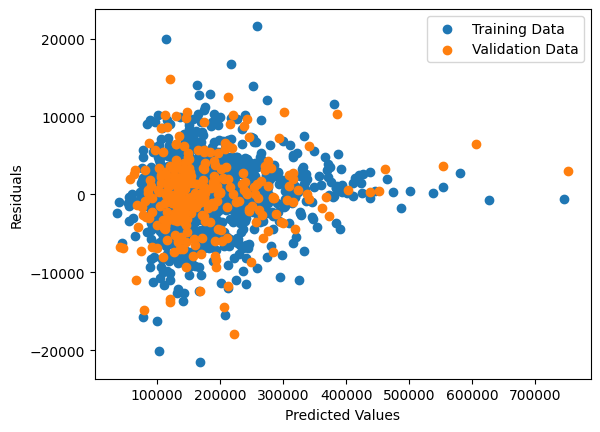

In [ ]:
residuals_train = y_train - y_pred_train
residuals_val = y_val - y_pred_val

# Plot residuals to check for patterns
# Example code for plotting residuals
import matplotlib.pyplot as plt

plt.scatter(y_pred_train, residuals_train, label='Training Data')
plt.scatter(y_pred_val, residuals_val, label='Validation Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()
